# Introduction
This part of the repository builds a detection system based on YOLOv4 object detector.

# Environment setup

## Google Drive mount
I'm using Google Colaboratory as my default platform, therefore I need to set up my environment to integrate it with Google Drive. You can skip this bit if you're working locally.

1. Mount Google Drive on the runtime to be able to read and write files. This will ask you to log in to your Google Account and provide an authorization code.
2. Create a symbolic link to a working directory 
3. Change the directory to the one where I cloned my repository.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/Colab\ Notebooks/dezeenAI /mydrive

In [3]:
%cd /mydrive

/content/gdrive/My Drive/Colab Notebooks/dezeenAI


## Libraries & functions
- `cv2` - computer vision library
- `matplotlib.pyplot` - visualisation & plotting library
- `sys` - system-specific parameters and functions
- `os.path` - common pathname manipulations

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os.path

#Darknet YOLOv4
YOLO (*You Only Look Once*) is an object detection system in real-time that recognizes various objects in a single enclosure. Currently it's one of the fastest and most precise object recognition systems.

Paper: [YOLOv4: Optimal Speed and Accuracy of Object Detection](https://arxiv.org/abs/2004.10934)

Code: [AlexeyAB/darknet](https://github.com/AlexeyAB/darknet)

Medium article: [YOLOv4 — the most accurate real-time neural network on MS COCO dataset.](https://medium.com/@alexeyab84/yolov4-the-most-accurate-real-time-neural-network-on-ms-coco-dataset-73adfd3602fe)

## Clone the repository
Let's first clone the official Darknet repository.

In [5]:
# !git clone https://github.com/AlexeyAB/darknet

## GPU, OpenCV & CUDA
In order for the processing to run faster it's better to enable GPU acceleration within Colab notebook which will make the runtime 100 times faster. In order for Darknet to work propely we need to enable OpenCV and CUDA as well. To do so:

1. Navigate to `Edit -> Notebook settings -> Hardware Accelerator: GPU`
2. Use `sed -i` bash command to write some lines in-place to the `Makefile` to enable OpenCV, GPU and CUDNN.

In [6]:
# %cd /mydrive/darknet
# !sed -i 's/OPENCV=0/OPENCV=1/' Makefile
# !sed -i 's/GPU=0/GPU=1/' Makefile
# !sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

## Verify CUDA
CUDA is a parallel computing platform and application programming interface model created by Nvidia. It allows to use a CUDA-enabled graphics processing unit.

In [7]:
# !/usr/local/cuda/bin/nvcc --version

## Make Darknet
`make` command builds Darknet and creates executables to run or train object detectors

In [8]:
# !make

## Weights
YOLOv4 comes with pre-trained weights trained on 80 object categories of [MS COCO Dataset](https://cocodataset.org/) which is a good starting point for further development. Let's download them from the official Darknet repository using `wget`.

In [9]:
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

# Object detection

## Helper functions

In [10]:
def showIMG(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(
      image,
      (3*width, 3*height),
      interpolation = cv2.INTER_CUBIC
      )

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(
      cv2.cvtColor(
          resized_image,
          cv2.COLOR_BGR2RGB
          )
      )
  plt.show()

## Out the box object detection
Darknet is now built and ready to run detections using YOLOv4 and pre-trained weights. It can already detect 80 classes of COCO Dataset. Let's test its performance on a pre-uploaded test picture.

- `./darknet` - YOLOv4 executable
- `detector` - detection function
- `coco.data` - dataset configuration
- `yolov4.cfg` - system architecture configuration
- `yolov4.weights` - pre-trained weights

/content/gdrive/My Drive/Colab Notebooks/dezeenAI/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
  

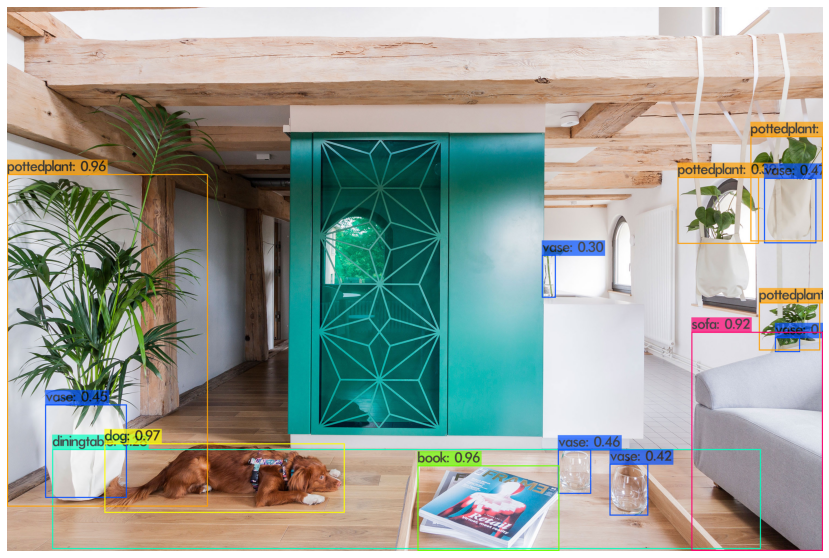

In [11]:
%cd /mydrive/darknet
!chmod +x ./darknet
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /mydrive/files/test.jpg
showIMG('predictions.jpg')

## Customized object detection
By using commandline flags it's possible to customize the detector to our needs.
- `-tresh 0.5` - sets the treshold value for predictions
- `-dont_show` - skips outputting the prediction picture (Notebook shows an error when trying to display the prediction) 
- `-ext_output` - outputs bounding boxes coordinates
- `-out` - saves the prediction output to an external file

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x

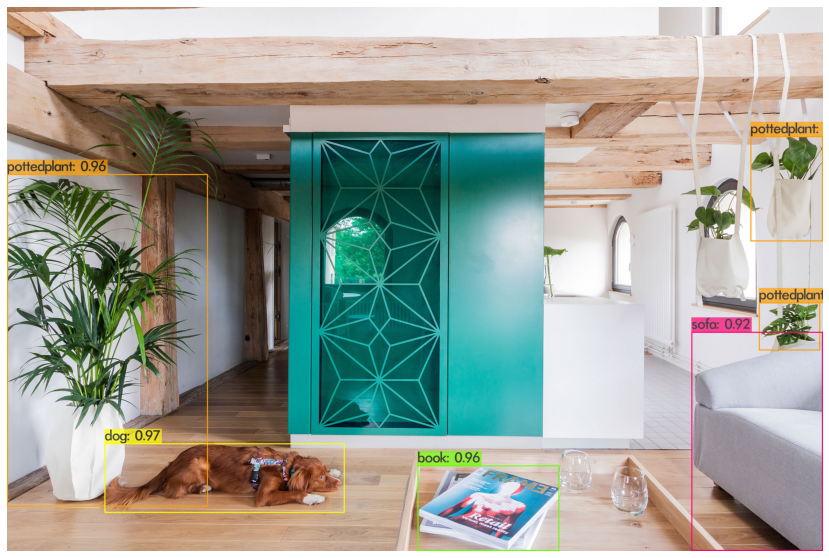

In [12]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show -thresh 0.5 /mydrive/files/test.jpg 
showIMG('predictions.jpg')

## Detection detail export
Let's save image detection details of multiple images into a .JSON file.

In [ ]:
# !./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -thresh 0.5 -dont_show -ext_output -out /mydrive/files/test_results.json < /mydrive/files/images.txt

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x

# Open Images Dataset v6
To add extra classes and improve performance let's download some more data from [Open Images Dataset v6](https://storage.googleapis.com/openimages/web/index.html). To do so let's use [OIDv4 ToolKit](https://github.com/theAIGuysCode/OIDv4_ToolKit).

## Categories
1. Create a list of Open Images categories to download
2. Create a string of collapsed category names for later use as a command parameter
3. Export category list to a txt file

In [13]:
classes = [
           'Sink',
           'Stairs',
           'Chair',
           'Cabinetry',
           'Desk',
           'Studio couch',
           'Couch',
           'Door',
           'Shower',
           'Wardrobe',
           'Nightstand',
           'Bathtub',
           'Houseplant',
           'Sofa bed',
           'Curtain',
           'Bed',
           'Fireplace',
           'Bookcase',
           'Table',
           'Mirror',
           'Chest of drawers',
           'Cupboard',
           'Coffee table',
           'Toilet',
           'Bench',
           'Window',
           'Closet',
           'Lamp',
           'Drawer',
           'Stool'
           ]

In [14]:
classes_dashed = ' '.join([cls.replace(' ', '_') for cls in classes])
classes_dashed

'Sink Stairs Chair Cabinetry Desk Studio_couch Couch Door Shower Wardrobe Nightstand Bathtub Houseplant Sofa_bed Curtain Bed Fireplace Bookcase Table Mirror Chest_of_drawers Cupboard Coffee_table Toilet Bench Window Closet Lamp Drawer Stool'

In [15]:
%cd /mydrive/OIDv4_ToolKit/
with open('classes.txt', 'w') as output:
    output.write('\n'.join(classes))

/content/gdrive/My Drive/Colab Notebooks/dezeenAI/OIDv4_ToolKit


## OIDv4_ToolKit
Let's use the [OIDv4_ToolKit](https://github.com/theAIGuysCode/OIDv4_ToolKit) repository to download the image files from the Open Image Dataset

In [16]:
# %cd /mydrive
# !git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git

## Install the library requirements
Let's install the library requirements essential for the toolkit to work properly.

In [17]:
!pip install -r /mydrive/OIDv4_ToolKit/requirements.txt

     |████████████████████████████████| 3.5MB 13.7MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 6.9MB 49.0MB/s 
     |████████████████████████████████| 552kB 53.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: botocore 1.19.26 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.
  Found existing installation: rsa 4.6
    Uninstalling rsa-4.6:
      Successfully uninstalled rsa-4.6
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


## Download training & validation sets
Let's use OIDv4_ToolKit's `main.py downloader` script to download the image files. 
- `--classes` followed by previously created collapsed string of category names points to the image classes we want to download
- `--type_csv` followed by `train` on `validation` indicates which dataset type we want to download
- `--limit` followed by an integer indicates the maximum of files we want to download
- `--multiclasses` followed by `1` or `0` indicates if we're deadling with a single- or a multiclass classification problem

1. Change the directory
2. Download train set
3. Download validation set

### Train set

In [ ]:
!python3 main.py downloader --classes {classes_dashed} --type_csv train --limit 500 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Sink', 'Stairs', 'Chair', 'Cabinetry', 'Desk', 'Studio couch', 'Couch', 'Door', 'Shower', 'Wardrobe', 'Nightstand', 'Bathtub', 'Houseplant', 'Sofa bed', 'Curtain', 'Bed', 'Fireplace', 'Bookcase'

### Validation set

In [ ]:
!python3 main.py downloader --classes {classes_dashed} --type_csv validation --limit 100 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Bathtub', 'Stairs'] together.

Bathtub
    [INFO] | Downloading validation images.
    [INFO] | [INFO] Found 14 online images for validation.
    [INFO] | Limiting to 100 images.
    [INFO] | Do

## Convert annotations

In [ ]:
!python3 convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  Bathtub_Stairs
100% 1000/1000 [00:30<00:00, 32.59it/s]
Currently in subdirectory: validation
Converting annotations for class:  Bathtub_Stairs
100% 44/44 [00:01<00:00, 31.08it/s]


## Move files

In [ ]:
%mkdir /mydrive/data/oid
%mv /mydrive/OIDv4_ToolKit/OID/Dataset/train /mydrive/data/oid
%mv /mydrive/OIDv4_ToolKit/OID/Dataset/validation /mydrive/data/oid

In [ ]:
%cd /mydrive/data/oid
%ls

/content/gdrive/My Drive/Colab Notebooks/dezeenAI/data/oid
train/  validation/


In [ ]:
# https://github.com/theAIGuysCode/yolov4-custom-functions
# !./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights  -ext_output -dont_show -out result.json < /mydrive/images.txt

# Training configuration
https://github.com/AlexeyAB/darknet#how-to-train-to-detect-your-custom-objects

## Create and edit a config file

In [ ]:
# !cp /mydrive/darknet/cfg/yolov4-custom.cfg /mydrive/files/yolov4-obj.cfg

## obj.names & obj.data

In [ ]:
%cd /mydrive/
with open('/mydrive/files/obj.names', 'w') as output:
    output.write('\n'.join([cls.replace(' ', '_') for cls in classes]))


/content/gdrive/My Drive/Colab Notebooks/dezeenAI


In [ ]:
_ = '''classes = 2
train = /mydrive/files/train.txt
valid = /mydrive/files/valid.txt
names = /mydrive/files/obj.names
backup = /mydrive/data/'''

with open('/mydrive/files/obj.data', 'w') as output:
    output.write(_)

## train.txt & valid.txt

In [ ]:
image_files = []
DIR = '/mydrive/data/oid/train/Bathtub_Stairs/'
os.chdir(DIR)

for filename in os.listdir(os.getcwd()):
  if filename.endswith('.jpg'):
    image_files.append(DIR + filename)

with open('/mydrive/files/train.txt', 'w') as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write('\n')
    outfile.close()

In [ ]:
image_files = []
DIR = '/mydrive/data/oid/validation/Bathtub_Stairs/'
os.chdir(DIR)

for filename in os.listdir(os.getcwd()):
  if filename.endswith('.jpg'):
    image_files.append(DIR + filename)

with open('/mydrive/files/valid.txt', 'w') as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write('\n')
    outfile.close()

# Custom detector

## Download pre-trained weights

In [ ]:
%cd /mydrive/files/
if os.path.isfile('/mydrive/data/yolov4.conv.137') is not True:
  !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

/content/gdrive/My Drive/Colab Notebooks/dezeenAI/files


## Train the model

- `detector`:
- `train`:
- `obj.data`: number and names of classes, list of train/val images, backup directory
- `yolov4-obj.cfg`: neural network architecture configuration
- `yolov4-obj_last.weights`: weights file
- `-dont_show`: suppress the display of an image
- `-map`:


In [ ]:
%cd /mydrive/files/
!chmod +x /mydrive/darknet/darknet
# !/mydrive/darknet/darknet detector train /mydrive/files/obj.data /mydrive/files/yolov4-obj.cfg /mydrive/data/yolov4.conv.137 -dont_show -map
!/mydrive/darknet/darknet detector train obj.data yolov4-obj.cfg yolov4-obj_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.672726, GIOU: 0.637503), Class: 0.991313, Obj: 0.153902, No Obj: 0.000270, .5R: 1.000000, .75R: 0.000000, count: 3, class_loss = 0.704299, iou_loss = 0.442179, total_loss = 1.146478 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.756328, GIOU: 0.739269), Class: 0.898477, Obj: 0.443157, No Obj: 0.002621, .5R: 1.000000, .75R: 0.500000, count: 8, class_loss = 1.152707, iou_loss = 0.383281, total_loss = 1.535988 
 total_bbox = 152236, rewritten_bbox = 0.777083 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.807068, GIOU: 0.804794), Class: 0.967637, Obj: 0.002077, No Obj: 0.000014, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.250287, iou_loss = 6.770397, total_loss = 7.020685 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.698891, GIOU: 0.676555), Class: 0.986740, Obj: 0.172384, No O

In [ ]:
showIMG('chart.png')

NameError: ignored

# References

- https://www.analyticssteps.com/blogs/introduction-yolov4
- https://www.youtube.com/watch?v=mmj3nxGT2YQ
- https://blog.roboflow.com/training-yolov4-on-a-custom-dataset/
- https://github.com/pjreddie/darknet/issues/1088
- https://medium.com/ai-world/how-to-train-yolov4-for-custom-objects-detection-in-google-colab-1e934b8ef685
- https://stackoverflow.com/questions/64022836/how-to-train-new-classes-on-pretrained-yolov4-model-in-darknet
- https://github.com/DucLeTrong/YOLOv4_with_OpenImagesV4_GoogleColab 